In [212]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import cross_val_score

In [218]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv', usecols = ['gender', 'reality','income_total','occyp_type'])

In [214]:
train_and_test = [train, test]

In [221]:
train['DAYS_BIRTH']

0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [220]:
train.corr()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


In [219]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [216]:
train['credit'] = train['credit'].replace(2, 1)

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26457 non-null  object 
 1   reality       26457 non-null  object 
 2   income_total  26457 non-null  float64
 3   occyp_type    18286 non-null  object 
 4   credit        26457 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [182]:
train.isnull().sum()

gender             0
reality            0
income_total       0
occyp_type      8171
credit             0
dtype: int64

In [183]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [184]:
train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

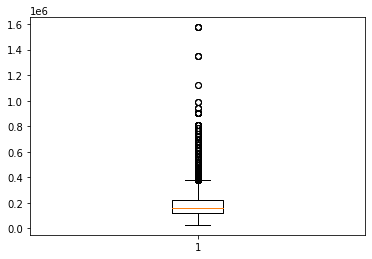

In [185]:
plt.boxplot(train['income_total'])

plt.show()

In [186]:
for dataset in train_and_test:
    num = dataset['income_total']
    Q1 = num.quantile(.25)
    Q2 = num.quantile(.5)
    Q3 = num.quantile(.75)
    IQR = Q3 - Q1

    print('Q1 : {q1} Q3 : {q3} IQR : {iqr}'.format(q1 = Q1, q3=Q3, iqr=IQR))

    dataset.loc[dataset['income_total'] > Q3 + 1.5*IQR, 'income_total'] = Q2

Q1 : 121500.0 Q3 : 225000.0 IQR : 103500.0
Q1 : 121500.0 Q3 : 225000.0 IQR : 103500.0


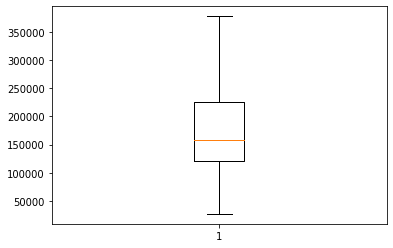

In [187]:
plt.boxplot(train['income_total'])

plt.show()


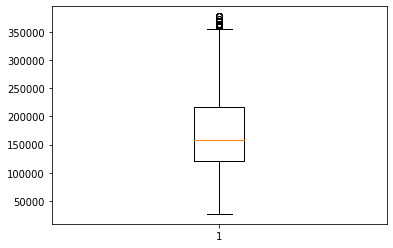

In [190]:
plt.boxplot(test['income_total'])

plt.show()

In [124]:
train.loc[0]

gender                 F
reality                N
income_total    202500.0
occyp_type           NaN
credit               1.0
Name: 0, dtype: object

In [125]:
train['income_total']

0        202500.0
1        247500.0
2        157500.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

In [192]:
X_train = train[['gender', 'reality','income_total','occyp_type']]
y_train = train['credit']

X_test = test

In [193]:
X_train = pd.get_dummies(X_train, drop_first= True)
X_test = pd.get_dummies(X_test, drop_first= True)

In [198]:
X_train.shape

(26457, 20)

In [199]:
X_test.shape

(10000, 20)

In [202]:
clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [203]:
accuracy = round(cross_val_score(clf, X_train , y_train).mean()*100, 4)

In [204]:
accuracy

87.5987

In [210]:
predict_target = clf.predict(X_train)

In [211]:
len(predict_target)

26457

In [ ]:
cross_val_score()